In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('Dallas data summary lag 6.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,121.62157,5.93,37170,5816.407,5.3,284456.508,1254.0813,43.20%,133706,2.30%,4281,4.19,188.9
1,4/1/2005,121.66380,5.86,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134186,2.30%,5548,4.69,196.6
2,5/1/2005,122.11284,5.72,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134186,2.30%,4878,4.58,196.6
3,6/1/2005,122.20399,5.58,39903,5999.411,5.4,307562.122,1254.0813,43.40%,134186,2.30%,5304,4.83,196.6
4,7/1/2005,121.91083,5.70,39903,5999.411,5.4,307562.122,1254.0813,43.40%,134032,2.30%,5140,5.06,196.6
5,8/1/2005,121.32849,5.82,39903,5999.411,5.2,307562.122,1254.0813,43.40%,134032,2.30%,6042,4.36,196.6
6,9/1/2005,121.52173,5.77,39903,5999.411,5.1,307562.122,1254.0813,43.40%,134032,2.30%,4361,4.39,196.6
7,10/1/2005,122.39961,6.07,39903,5999.411,4.8,307562.122,1254.0813,43.20%,134539,2.50%,4814,4.45,196.6
8,11/1/2005,123.28627,6.33,39903,5999.411,5.0,307562.122,1254.0813,43.20%,134539,2.50%,4713,4.34,196.6
9,12/1/2005,124.49855,6.27,39903,5999.411,4.8,307562.122,1254.0813,43.20%,134539,2.50%,5458,4.32,196.6


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,121.62157,5.93,37170,5816.407,5.3,284456.508,1254.0813,133706,4281,4.19,188.9,43.2,2.3
1,4/1/2005,121.66380,5.86,39903,5999.411,5.1,307562.122,1254.0813,134186,5548,4.69,196.6,43.4,2.3
2,5/1/2005,122.11284,5.72,39903,5999.411,5.1,307562.122,1254.0813,134186,4878,4.58,196.6,43.4,2.3
3,6/1/2005,122.20399,5.58,39903,5999.411,5.4,307562.122,1254.0813,134186,5304,4.83,196.6,43.4,2.3
4,7/1/2005,121.91083,5.70,39903,5999.411,5.4,307562.122,1254.0813,134032,5140,5.06,196.6,43.4,2.3


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,37170,5816.407,5.3,284456.508,1254.0813,133706,4281,4.19,188.900,43.2,2.3
1,5.86,39903,5999.411,5.1,307562.122,1254.0813,134186,5548,4.69,196.600,43.4,2.3
2,5.72,39903,5999.411,5.1,307562.122,1254.0813,134186,4878,4.58,196.600,43.4,2.3
3,5.58,39903,5999.411,5.4,307562.122,1254.0813,134186,5304,4.83,196.600,43.4,2.3
4,5.70,39903,5999.411,5.4,307562.122,1254.0813,134032,5140,5.06,196.600,43.4,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...
143,4.17,56864,7455.756,4.1,505768.515,774.6436,138819,4914,3.98,225.753,35.3,1.4
144,4.20,56864,7455.756,3.9,505768.515,774.6436,138819,6397,3.93,225.753,35.3,1.4
145,4.05,56864,7455.756,3.5,505768.515,774.6436,140633,4205,3.69,225.753,35.1,1.2
146,4.01,56864,7455.756,3.6,505768.515,774.6436,140633,4995,3.77,225.753,35.1,1.2


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),148.0,4.804324,1.043601,3.3500,3.9350,4.4750,5.9200,6.760000e+00
Personal_Income,148.0,46208.783784,5037.989497,37170.0000,41319.0000,46644.0000,50670.0000,5.686400e+04
Resident_Population,148.0,6669.841115,419.878124,5816.4070,6392.0650,6644.5590,7042.5660,7.455756e+03
Unemployment_Rate,148.0,5.602027,1.529504,3.5000,4.2750,5.2000,6.8000,8.700000e+00
GDP,148.0,482144.459074,366469.329508,284456.5080,336217.2700,374743.3120,435857.5220,1.699894e+06
Crime_Rate,148.0,830.025336,201.366157,663.7371,681.1003,762.4122,894.8343,1.254081e+03
Median_Debt,148.0,133194.804054,3480.579744,127063.0000,130039.0000,134215.0000,135963.0000,1.406330e+05
New_Structures,148.0,3327.500000,1362.068757,1098.0000,2176.7500,3281.0000,4355.7500,7.374000e+03
Economic_Conditions_Index,148.0,3.302568,2.128434,-4.4600,3.4875,4.0150,4.4425,5.220000e+00
CPI all items less shelter,148.0,214.766412,9.306897,188.9000,209.4070,219.7360,221.2480,2.257530e+02


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.078645,-1.794125,-2.032576,-0.197467,-0.539439,2.105895,0.146871,0.700038,0.416941,-2.779273,0.867166,-0.615476
1,1.011570,-1.251647,-1.596726,-0.328229,-0.476390,2.105895,0.284779,1.630241,0.651856,-1.951930,0.933185,-0.615476
2,0.877419,-1.251647,-1.596726,-0.328229,-0.476390,2.105895,0.284779,1.138342,0.600175,-1.951930,0.933185,-0.615476
3,0.743268,-1.251647,-1.596726,-0.132087,-0.476390,2.105895,0.284779,1.451101,0.717632,-1.951930,0.933185,-0.615476
4,0.858255,-1.251647,-1.596726,-0.132087,-0.476390,2.105895,0.240533,1.330696,0.825693,-1.951930,0.933185,-0.615476
...,...,...,...,...,...,...,...,...,...,...,...,...
143,-0.607822,2.114974,1.871769,-0.982035,0.064464,-0.275030,1.615879,1.164772,0.318277,1.180478,-1.740578,-1.551336
144,-0.579076,2.114974,1.871769,-1.112796,0.064464,-0.275030,1.615879,2.253557,0.294786,1.180478,-1.740578,-1.551336
145,-0.722809,2.114974,1.871769,-1.374319,0.064464,-0.275030,2.137057,0.644241,0.182027,1.180478,-1.806597,-1.759305
146,-0.761138,2.114974,1.871769,-1.308938,0.064464,-0.275030,2.137057,1.224241,0.219613,1.180478,-1.806597,-1.759305


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

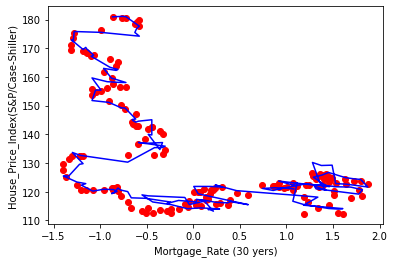

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 1.87
Accuracy: 98.54 %.


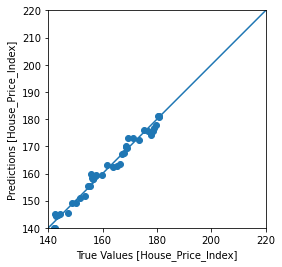

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9854340814650372

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,-2.637129
1,5.969815
2,3.202113
3,-2.849930
4,-0.010533
5,2.124486
6,4.096729
7,0.450016
8,-1.473161
9,-5.700819


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[121.00161858 121.19474985 121.40329547 121.16579086 120.46791993
 121.31985322 121.05637917 122.77636413 121.78946147 122.57372342
 125.06868002 125.85882981 126.72340691 124.9282886  124.53765043
 124.29253447 121.66971335 122.65382542 122.85552489 129.27192644
 129.16232398 130.20757912 123.29636807 120.53886469 122.01648816
 121.03252425 120.74404517 119.18390979 120.68617191 121.62695758
 121.77496091 121.8863792  122.32724479 122.53137297 123.74066471
 122.36629139 123.14966093 116.70872699 115.57853436 114.18418553
 113.9652396  114.14185693 115.32376646 118.13504335 118.44553265
 120.39666202 122.37551001 121.6534913  121.85924124 121.86644323
 119.28741913 115.51606089 116.58412488 116.15596749 116.31612743
 116.95258888 117.05495972 116.71828226 113.25406473 113.85053783
 113.82183511 114.03083153 114.39289753 114.10968212 115.49634268
 116.0995495  116.45241794 118.92480889 118.58446293 118.01937206
 115.54857045 116.86847145 117.37029995 116.44555714 116.98604918
 115.92345

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,121.001619
1,121.194750
2,121.403295
3,121.165791
4,120.467920
...,...
143,176.872159
144,177.693588
145,181.002511
146,181.122897


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,1.404440,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
Personal_Income,-1.794125,-1.251647,-1.251647,-1.251647,-1.251647,-1.251647,-1.251647,-1.251647,-1.251647,-1.251647,...,1.520689,1.520689,1.520689,1.520689,1.520689,2.114974,2.114974,2.114974,2.114974,2.114974
Resident_Population,-2.032576,-1.596726,-1.596726,-1.596726,-1.596726,-1.596726,-1.596726,-1.596726,-1.596726,-1.596726,...,1.589166,1.589166,1.589166,1.589166,1.589166,1.871769,1.871769,1.871769,1.871769,1.871769
Unemployment_Rate,-0.197467,-0.328229,-0.328229,-0.132087,-0.132087,-0.262848,-0.328229,-0.524371,-0.393609,-0.524371,...,-0.982035,-1.112796,-1.243558,-1.243558,-0.982035,-0.982035,-1.112796,-1.374319,-1.308938,-1.112796
GDP,-0.539439,-0.476390,-0.476390,-0.476390,-0.476390,-0.476390,-0.476390,-0.476390,-0.476390,-0.476390,...,3.322924,3.322924,3.322924,3.322924,3.322924,0.064464,0.064464,0.064464,0.064464,0.064464
Crime_Rate,2.105895,2.105895,2.105895,2.105895,2.105895,2.105895,2.105895,2.105895,2.105895,2.105895,...,-0.335772,-0.335772,-0.335772,-0.335772,-0.275030,-0.275030,-0.275030,-0.275030,-0.275030,-0.275030
Median_Debt,0.146871,0.284779,0.284779,0.284779,0.240533,0.240533,0.240533,0.386199,0.386199,0.386199,...,0.481298,1.049019,1.049019,1.049019,1.615879,1.615879,1.615879,2.137057,2.137057,2.137057
New_Structures,0.700038,1.630241,1.138342,1.451101,1.330696,1.992924,0.758772,1.091355,1.017203,1.564165,...,0.244114,0.940114,1.160367,0.657456,2.001734,1.164772,2.253557,0.644241,1.224241,1.711734
Economic_Conditions_Index,0.416941,0.651856,0.600175,0.717632,0.825693,0.496812,0.510907,0.539097,0.487416,0.478019,...,0.341769,0.290088,0.299484,0.304183,0.365260,0.318277,0.294786,0.182027,0.219613,0.299484
CPI all items less shelter,-2.779273,-1.951930,-1.951930,-1.951930,-1.951930,-1.951930,-1.951930,-1.951930,-1.951930,-1.951930,...,0.696428,0.696428,0.696428,0.696428,0.696428,1.180478,1.180478,1.180478,1.180478,1.180478


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,138,139,140,141,142,143,144,145,146,147
0,Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
1,Personal_Income,-1.794125,-1.251647,-1.251647,-1.251647,-1.251647,-1.251647,-1.251647,-1.251647,-1.251647,...,1.520689,1.520689,1.520689,1.520689,1.520689,2.114974,2.114974,2.114974,2.114974,2.114974
2,Resident_Population,-2.032576,-1.596726,-1.596726,-1.596726,-1.596726,-1.596726,-1.596726,-1.596726,-1.596726,...,1.589166,1.589166,1.589166,1.589166,1.589166,1.871769,1.871769,1.871769,1.871769,1.871769
3,Unemployment_Rate,-0.197467,-0.328229,-0.328229,-0.132087,-0.132087,-0.262848,-0.328229,-0.524371,-0.393609,...,-0.982035,-1.112796,-1.243558,-1.243558,-0.982035,-0.982035,-1.112796,-1.374319,-1.308938,-1.112796
4,GDP,-0.539439,-0.476390,-0.476390,-0.476390,-0.476390,-0.476390,-0.476390,-0.476390,-0.476390,...,3.322924,3.322924,3.322924,3.322924,3.322924,0.064464,0.064464,0.064464,0.064464,0.064464
5,Crime_Rate,2.105895,2.105895,2.105895,2.105895,2.105895,2.105895,2.105895,2.105895,2.105895,...,-0.335772,-0.335772,-0.335772,-0.335772,-0.275030,-0.275030,-0.275030,-0.275030,-0.275030,-0.275030
6,Median_Debt,0.146871,0.284779,0.284779,0.284779,0.240533,0.240533,0.240533,0.386199,0.386199,...,0.481298,1.049019,1.049019,1.049019,1.615879,1.615879,1.615879,2.137057,2.137057,2.137057
7,New_Structures,0.700038,1.630241,1.138342,1.451101,1.330696,1.992924,0.758772,1.091355,1.017203,...,0.244114,0.940114,1.160367,0.657456,2.001734,1.164772,2.253557,0.644241,1.224241,1.711734
8,Economic_Conditions_Index,0.416941,0.651856,0.600175,0.717632,0.825693,0.496812,0.510907,0.539097,0.487416,...,0.341769,0.290088,0.299484,0.304183,0.365260,0.318277,0.294786,0.182027,0.219613,0.299484
9,CPI all items less shelter,-2.779273,-1.951930,-1.951930,-1.951930,-1.951930,-1.951930,-1.951930,-1.951930,-1.951930,...,0.696428,0.696428,0.696428,0.696428,0.696428,1.180478,1.180478,1.180478,1.180478,1.180478


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI all items less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),-2.637129
1,Personal_Income,5.969815
2,Resident_Population,3.202113
3,Unemployment_Rate,-2.849930
4,GDP,-0.010533
5,Crime_Rate,2.124486
6,Median_Debt,4.096729
7,New_Structures,0.450016
8,Economic_Conditions_Index,-1.473161
9,CPI all items less shelter,-5.700819


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

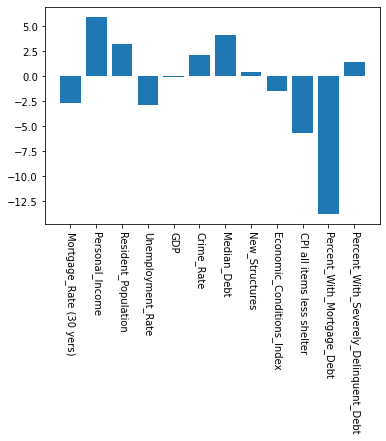

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,7/1/2017,178.50937,3.97,56864,7455.756,3.9,505768.515,774.6436,34.70%,142486,1.20%,4250,3.76,225.753
1,8/1/2017,179.03170,3.88,56864,7455.756,3.9,505768.515,774.6436,34.70%,142486,1.20%,6620,3.91,225.753
2,9/1/2017,179.73311,3.81,56864,7455.756,3.5,505768.515,774.6436,34.70%,142486,1.20%,4446,4.15,225.753
3,10/1/2017,180.42716,3.90,56864,7455.756,3.3,505768.515,774.6436,34.50%,144208,1.40%,6459,4.03,225.753
4,11/1/2017,180.64196,3.92,56864,7455.756,3.4,505768.515,774.6436,34.50%,144208,1.40%,3754,3.73,225.753
5,12/1/2017,180.78713,3.95,56864,7455.756,3.3,505768.515,774.6436,34.50%,144208,1.40%,3631,3.54,225.753
6,1/1/2018,181.23406,4.03,56864,7455.756,3.7,505768.515,764.9371,34.70%,145761,1.30%,5687,3.46,225.753
7,2/1/2018,182.28582,4.33,58725,7573.136,3.7,523861.973,764.9371,34.70%,145761,1.30%,3979,3.59,228.881
8,3/1/2018,183.58835,4.44,58725,7573.136,3.6,523861.973,764.9371,34.70%,145761,1.30%,4814,3.72,228.881
9,4/1/2018,185.27276,4.47,58725,7573.136,3.3,523861.973,764.9371,34.50%,147349,1.10%,8213,3.81,228.881


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,7/1/2017,178.50937,3.97,56864,7455.756,3.9,505768.515,774.6436,142486,4250,3.76,225.753,34.7,1.2
1,8/1/2017,179.03170,3.88,56864,7455.756,3.9,505768.515,774.6436,142486,6620,3.91,225.753,34.7,1.2
2,9/1/2017,179.73311,3.81,56864,7455.756,3.5,505768.515,774.6436,142486,4446,4.15,225.753,34.7,1.2
3,10/1/2017,180.42716,3.90,56864,7455.756,3.3,505768.515,774.6436,144208,6459,4.03,225.753,34.5,1.4
4,11/1/2017,180.64196,3.92,56864,7455.756,3.4,505768.515,774.6436,144208,3754,3.73,225.753,34.5,1.4


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3.97,56864,7455.756,3.9,505768.515,774.6436,142486,4250,3.76,225.753,34.7,1.2
1,3.88,56864,7455.756,3.9,505768.515,774.6436,142486,6620,3.91,225.753,34.7,1.2
2,3.81,56864,7455.756,3.5,505768.515,774.6436,142486,4446,4.15,225.753,34.7,1.2
3,3.90,56864,7455.756,3.3,505768.515,774.6436,144208,6459,4.03,225.753,34.5,1.4
4,3.92,56864,7455.756,3.4,505768.515,774.6436,144208,3754,3.73,225.753,34.5,1.4
5,3.95,56864,7455.756,3.3,505768.515,774.6436,144208,3631,3.54,225.753,34.5,1.4
6,4.03,56864,7455.756,3.7,505768.515,764.9371,145761,5687,3.46,225.753,34.7,1.3
7,4.33,58725,7573.136,3.7,523861.973,764.9371,145761,3979,3.59,228.881,34.7,1.3
8,4.44,58725,7573.136,3.6,523861.973,764.9371,145761,4814,3.72,228.881,34.7,1.3
9,4.47,58725,7573.136,3.3,523861.973,764.9371,147349,8213,3.81,228.881,34.5,1.1


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.155000,0.298374,3.8100,3.9150,4.00000,4.4475,4.5900
Personal_Income,12.0,57639.416667,958.282219,56864.0000,56864.0000,56864.00000,58725.0000,58725.0000
Resident_Population,12.0,7504.664333,60.442325,7455.7560,7455.7560,7455.75600,7573.1360,7573.1360
Unemployment_Rate,12.0,3.566667,0.249848,3.3000,3.3000,3.55000,3.7500,3.9000
GDP,12.0,513307.455833,9316.839912,505768.5150,505768.5150,505768.51500,523861.9730,523861.9730
Crime_Rate,12.0,769.790350,5.069054,764.9371,764.9371,769.79035,774.6436,774.6436
Median_Debt,12.0,144951.000000,1885.454708,142486.0000,143777.5000,144984.50000,146158.0000,147349.0000
New_Structures,12.0,5205.916667,1385.369098,3631.0000,4182.2500,4809.50000,5974.5000,8213.0000
Economic_Conditions_Index,12.0,3.842500,0.259059,3.4600,3.6875,3.78500,4.0600,4.2500
CPI all items less shelter,12.0,227.056333,1.610697,225.7530,225.7530,225.75300,228.8810,228.8810


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.799467,2.114974,1.871769,-1.112796,0.064464,-0.275030,2.669439,0.677279,0.214915,1.180478,-1.938634,-1.759305
1,-0.885706,2.114974,1.871769,-1.112796,0.064464,-0.275030,2.669439,2.417279,0.285389,1.180478,-1.938634,-1.759305
2,-0.952782,2.114974,1.871769,-1.374319,0.064464,-0.275030,2.669439,0.821177,0.398148,1.180478,-1.938634,-1.759305
3,-0.866542,2.114974,1.871769,-1.505080,0.064464,-0.275030,3.164184,2.299076,0.341769,1.180478,-2.004653,-1.551336
4,-0.847378,2.114974,1.871769,-1.439700,0.064464,-0.275030,3.164184,0.313127,0.200820,1.180478,-2.004653,-1.551336
5,-0.818631,2.114974,1.871769,-1.505080,0.064464,-0.275030,3.164184,0.222823,0.111553,1.180478,-2.004653,-1.551336
6,-0.741973,2.114974,1.871769,-1.243558,0.064464,-0.323233,3.610374,1.732291,0.073966,1.180478,-1.938634,-1.655321
7,-0.454507,2.484367,2.151326,-1.243558,0.113836,-0.323233,3.610374,0.478317,0.135044,1.516573,-1.938634,-1.655321
8,-0.349103,2.484367,2.151326,-1.308938,0.113836,-0.323233,3.610374,1.091355,0.196122,1.516573,-1.938634,-1.655321
9,-0.320356,2.484367,2.151326,-1.505080,0.113836,-0.323233,4.066620,3.586823,0.238406,1.516573,-2.004653,-1.863290


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[184.42852133 185.33515437 185.37297926 189.50737361 188.58443577
 188.78582487 189.23598905 189.00746638 189.1017315  193.12227938
 191.45082464 190.65412415]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,184.428521
1,185.335154
2,185.372979
3,189.507374
4,188.584436
5,188.785825
6,189.235989
7,189.007466
8,189.101732
9,193.122279
